In [1]:
% matplotlib inline
import time

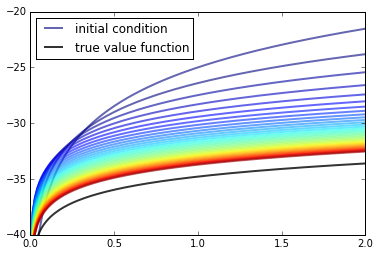

In [2]:
from __future__ import division  # Omit for Python 3.x
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from scipy.optimize import fminbound
from scipy import interp

# Primitives and grid
alpha = 0.65
beta = 0.95
grid_max = 2
grid_size = 150
grid = np.linspace(1e-6, grid_max, grid_size)
# Exact solution
ab = alpha * beta
c1 = (log(1 - ab) + log(ab) * ab / (1 - ab)) / (1 - beta)
c2 = alpha / (1 - ab)


def v_star(k):
    return c1 + c2 * log(k)


# this function processes step2 and step3 in fitted value function iteration
def bellman_operator(w):
    """
    The approximate Bellman operator, which computes and returns the updated
    value function Tw on the grid points.
        * w is a flat NumPy array with len(w) = len(grid)
    The vector w represents the value of the input function on the grid
    points.
    """
    # === Apply linear interpolation to w === #
    # interp is numpy's function
    # interp(x, grid, w) returns the array of the fitted values corresponding to x obtained by the interpolation
    # this is step 2 ,making w_hat
    Aw = lambda x: interp(x, grid, w)

    # === set Tw[i] equal to max_c { log(c) + beta w(f(k_i) - c)} === #
    Tw = np.empty(grid_size)
    # k is a state
    for i, k in enumerate(grid):
        # to consider the maximized value we think of the minimumized value of the function multiplied -1
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)  
        # fminbound is the function which returns the minimizer of the function
        c_star = fminbound(objective, 1e-6, k**alpha)
        # this process is really like the shortest paths
        Tw[i] = - objective(c_star)

    return Tw

# === If file is run directly, not imported, produce figure === #
if __name__ == '__main__':

    w = 5 * log(grid) - 25  # An initial condition -- fairly arbitrary
    # this form of function cannot be specified usualy. So, we need more time to solve the problem like this.
    n = 35
    fig, ax = plt.subplots()
    ax.set_ylim(-40, -20)
    ax.set_xlim(np.min(grid), np.max(grid))
    lb = 'initial condition'
    ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)
    for i in range(n):
        w = bellman_operator(w)
        ax.plot(grid, w, color=plt.cm.jet(i / n), lw=2, alpha=0.6)
    lb = 'true value function'
    ax.plot(grid, v_star(grid), 'k-', lw=2, alpha=0.8, label=lb)
    ax.legend(loc='upper left')

    plt.show()

In [3]:
# 上のベルマンオペレーターを利用してfitted value function iterationを回せるようにする
epsilon = 0.00001
max_iteration = 500
count = 1

for i in range(max_iteration):
    w_1 = bellman_operator(w)
    gap = [0 if (w_1[j] - w[j])**2 < epsilon else 1 for j in range(len(w))]
    
    if 1 in gap:
        w = w_1
        count = count + 1
    
    else:
        count = count + 1
        break
        
print count
print w_1

105
[-179.30569734  -42.12646539  -40.94190584  -40.24792061  -39.75509536
  -39.37530458  -39.06556961  -38.80363831  -38.57674431  -38.37670518
  -38.19748697  -38.03494647  -37.88658524  -37.75045878  -37.62478728
  -37.50699803  -37.39704758  -37.29412276  -37.19629959  -37.10301379
  -37.01684473  -36.9340564   -36.85507487  -36.77982684  -36.70712573
  -36.63829471  -36.57151993  -36.50706052  -36.44547949  -36.38598941
  -36.32860733  -36.2725149   -36.21864324  -36.16598813  -36.11560969
  -36.06624261  -36.01860905  -35.97197102  -35.9269057   -35.88270527
  -35.83945466  -35.79739136  -35.75656498  -35.71649006  -35.67723775
  -35.63888334  -35.60186314  -35.56529668  -35.52960032  -35.4943627
  -35.46029005  -35.42660677  -35.39372253  -35.36118908  -35.3295475
  -35.29850204  -35.26789906  -35.23783111  -35.20816166  -35.1790953
  -35.15032478  -35.12231377  -35.09454311  -35.06739411  -35.04073389
  -35.01433555  -34.98844292  -34.96274469  -34.93759887  -34.91264009
  -34

In [3]:
#bellman_operatorをgrid size調整可能にしつつ、上のやつを関数にする
import time
epsilon = 0.00001
max_iteration = 500


def bellman_operator(w, g):
    grid_max = 2
    grid_size = g
    grid = np.linspace(1e-6, grid_max, grid_size)
    
    Aw = lambda x: interp(x, grid, w)
    Tw = np.empty(grid_size)
  
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)  
        c_star = fminbound(objective, 1e-6, k**alpha)
        Tw[i] = - objective(c_star)
        
    return Tw

def time_lapse(gridsize, max_value, max_iteration, epsilon):
    grid_max = max_value
    m = max_iteration
    e = epsilon
    grid = np.linspace(1e-6, grid_max, gridsize)
    w = 5 * log(grid) - 25
    
    start = time.time()
    for i in range(max_iteration):
        w_1 = bellman_operator(w, gridsize)
        gap = [0 if (w_1[j] - w[j])**2 < epsilon else 1 for j in range(len(w))]
    
        if 1 in gap:
            w = w_1
    
        else:
            t = time.time() - start
            break
    
    return t

In [29]:
#試し
time_lapse(150, 2, 500, 0.0001)

5.6476781368255615

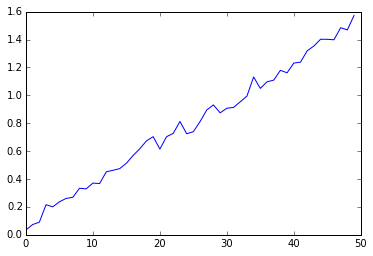

In [24]:
#gridsizeに対応する必要時間をプロットする
# grid sizeが10増えると0.3秒長くなるように見える
max_gridsize = 50
n = [None] * max_gridsize

for i in range(max_gridsize):
    n[i] = time_lapse(i + 1, 2, 1000, 0.001)

plt.plot(n)

In [4]:
#上を関数に
def plot_graph_fitted_value(max_gridsize):
    n = [None] * max_gridsize

    for i in range(max_gridsize):
        n[i] = time_lapse(i + 1, 2, 1000, 0.001)

    plt.plot(n)

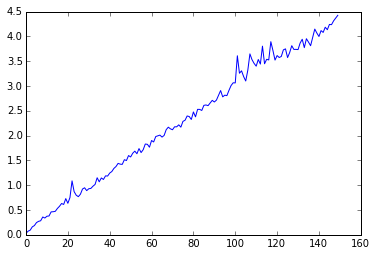

In [28]:
#こちらもやはりグリッドサイズが10大きくなるごとに0.3大きくなる
plot_graph_fitted_value(150)

In [6]:
time_lapse(300, 2,1000,0.001)

7.447414875030518

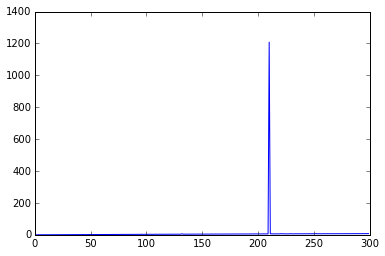

In [5]:
# grid size = 300まで
#異常値が出てしまった？
plot_graph_fitted_value(300)

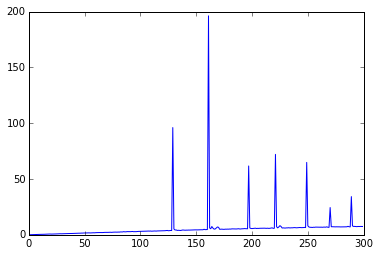

In [8]:
#もう一回
#何度か異常値が出る
#とはいえ線形に必要時間が長くなっていく
plot_graph_fitted_value(300)

In [6]:
# βをいじる
# bellman operatorでベータもいじれるようにする

def bellman_operator_2(w, g, b):
    grid_max = 2
    grid_size = g
    beta = b
    grid = np.linspace(1e-6, grid_max, grid_size)
    
    Aw = lambda x: interp(x, grid, w)
    Tw = np.empty(grid_size)
  
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)  
        c_star = fminbound(objective, 1e-6, k**alpha)
        Tw[i] = - objective(c_star)
        
    return Tw

def time_lapse_2(gridsize, max_value, max_iteration, b_ta, epsilon):
    grid_max = max_value
    m = max_iteration
    e = epsilon
    grid = np.linspace(1e-6, grid_max, gridsize)
    w = 5 * log(grid) - 25
    
    start = time.time()
    for i in range(max_iteration):
        w_1 = bellman_operator_2(w, gridsize, b_ta)
        gap = [0 if (w_1[j] - w[j])**2 < epsilon else 1 for j in range(len(w))]
    
        if 1 in gap:
            w = w_1
    
        else:
            t = time.time() - start
            break
    
    return t



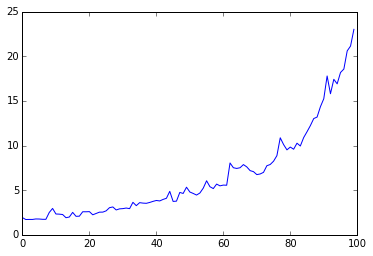

In [8]:
# betaをあげてみる
#結構急激に所要時間が増えている様子が確認
variable_beta = np.linspace(0.9, 0.99, 100)
m = [None] * 100
count = 0

for i in variable_beta:
    m[count] = time_lapse_2(150, 2, 1000, i, 0.001)
    count = count + 1
    
plt.plot(m)

In [ ]:
# 問題を線形計画法で書き直す
# 書き直せるのか？

import gurobipy as gp
lp = Model()
grid_max = 2
gridsize = 150
beta = 0.99
action_space = np.linspace(1e-6, grid_max, gridsize)

#変数の追加
x = {}
for i in range(gridsize):
    x[i ] = LP.addVar(vtype = "C", name = "x(%s)" %(i))
LP.update()

#制約の追加
for i in range(gridsize):
    lp.addConstr (x[i] - beta * quicksum(x[j] for j in )) # 変化後のstateが元々のvalue functionの引数になるとは限らない？
    #かけない…

In [9]:
np.linspace(0,2,50)[:20]

array([ 0.        ,  0.04081633,  0.08163265,  0.12244898,  0.16326531,
        0.20408163,  0.24489796,  0.28571429,  0.32653061,  0.36734694,
        0.40816327,  0.44897959,  0.48979592,  0.53061224,  0.57142857,
        0.6122449 ,  0.65306122,  0.69387755,  0.73469388,  0.7755102 ])